# LunAPI : individuals

Links to notebooks in this repository: [Index](./00_overview.ipynb) | [Luna tutorial](./tutorial.ipynb) | 
[Individuals](./01_indivs.ipynb) | [Projects](./02_projects.ipynb) | [Staging](./03_staging.ipynb) | [Models](./04_models.ipynb) | [Advanced](./98_advanced.ipynb) | [Reference](./99_reference.ipynb)

---

First, we import `lunapi` and initiate a _project_:

In [1]:
import lunapi as lp
proj = lp.proj()

initiated lunapi v0.0.7 <lunapi.lunapi0.luna object at 0x11b2d9330> 



We then create a single _instance_: here to match the NSRR tutorial individual `learn-nsrr02`

In [2]:
p = proj.inst( 'learn-nsrr02' )

<div class="alert alert-block alert-info"><b>Note:</b> Here we use the convention of calling the <em>project</em> <tt>proj</tt> and the current/main <em>instance</em> <tt>p</tt>.</div>

We can then attach the corresponding EDF file from disk using `attach_edf()`:

In [3]:
p.attach_edf( 'tutorial/edfs/learn-nsrr02.edf' )

___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


True

Second, we can also attach the XML annotations associated with that individual using `attach_annot()`:

In [4]:
p.attach_annot( 'tutorial/edfs/learn-nsrr02.xml' )

True

To get a short description of the instance, just enter its name:

In [5]:
p

<lunapi-instance id:learn-nsrr02 edf:tutorial/edfs/learn-nsrr02.edf annot:tutorial/edfs/learn-nsrr02.xml>

Above, we see the ID, the attached EDF and the annotation file(s) are listed, as expected.

## Simple summaries

Next, we'll get some basic summary information on the attached individual.  First some overall descriptives:

In [6]:
p.stat()

,Value
annotation_files,tutorial/edfs/learn-nsrr02.xml
duration,09.57.30.000
edf_file,tutorial/edfs/learn-nsrr02.edf
id,learn-nsrr02
na,10
ns,14
nt,14
state,1


Next, a list of current channels in the (attached/in-memory) EDF:

In [7]:
p.channels()

,Channels
0,SaO2
1,PR
2,EEG_sec
3,ECG
4,EMG
5,EOG_L
6,EOG_R
7,EEG
8,AIRFLOW
9,THOR_RES


The above, but with more information from `headers()`:

In [8]:
p.headers()

,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,ABDO_RES,127,-128,.,-1.0,1.0,11,-0.007843,10.0,.,EFFORT
1,learn-nsrr02,AIRFLOW,127,-128,.,-1.0,1.0,9,-0.007843,10.0,.,AIRFLOW
2,learn-nsrr02,ECG,127,-128,mV,1.25,-1.25,4,0.009804,250.0,.,ECG
3,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
4,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG
5,learn-nsrr02,EMG,127,-128,uV,31.5,-31.5,5,0.247059,125.0,.,EMG
6,learn-nsrr02,EOG_L,127,-128,uV,125.0,-125.0,6,0.980392,50.0,.,EOG
7,learn-nsrr02,EOG_R,127,-128,uV,125.0,-125.0,7,0.980392,50.0,.,EOG
8,learn-nsrr02,LIGHT,1,0,.,1.0,0.0,13,1.0,1.0,.,LIGHT
9,learn-nsrr02,OX_STAT,3,0,.,3.0,0.0,14,1.0,1.0,.,OXYGEN


And also list of associated annotations:

In [9]:
p.annots()

,Annotations
0,Arousal
1,Hypopnea
2,N1
3,N2
4,N3
5,Obstructive_Apnea
6,R
7,SpO2_artifact
8,SpO2_desaturation
9,W


## Applying Luna commands

Rather than providing a specific Python function for every single command Luna supports, Luna command scripts can be passed as text to the `eval()` or `proc()` functions and will be processed in exactly the same manner as the command line version of Luna would do.  This is the primary mode of using `lunapi` as an interface to Luna.

### A simple example

There are two main ways to evaluate Luna commands on a single attached _instance_: `eval()` and `proc()`.  These differ only in how they return outputs.  

The `eval()` function keeps any outputs within the _instance_ (i.e. here, the object reference by `p`) and returns only the equivalent _console_ outputs.  Outputs are then accessed via `strata()` and `table()` functions (i.e. similar to using `destrat` after a command-line Luna run).   

Alternatively, `proc()` returns all outputs in a single Python data-frame (along with the console output).  

Which of these two to use is really just a matter of preference/context.  We'll demonstrate both below, first using `eval()`:

In [10]:
p.eval('HEADERS')

 ..................................................................
 CMD #1: HEADERS
   options: sig=*


,Command,Strata
0,HEADERS,BL
1,HEADERS,CH


The table returned automatically by `eval()` is identical to the result of calling `strata()` explicitly after one or Luna commands have been evaluated:

In [11]:
p.strata()

,Command,Strata
0,HEADERS,BL
1,HEADERS,CH


That is, we see the `HEADERS` command has returned two tables: one _baseline_ table (the `BL` code effectively means there are no stratifying factors in the output) and one stratied by channel (`CH`).  We can use `table()` to obtain either table.  First, the baseline results (i.e. only one value for each output variable for that individual):

In [12]:
p.table('HEADERS','BL')

,ID,EDF_ID,EDF_TYPE,NR,NS,NS_ALL,REC_DUR,REC_DUR_HMS,REC_DUR_SEC,START_DATE,START_TIME,STOP_TIME,TOT_DUR_HMS,TOT_DUR_SEC
0,learn-nsrr02,.,EDF,35850,14,14,1.0,09:57:30,35850.0,01.01.85,21.18.06,07.15.36,09:57:30,35850.0


Note that if second strata argument is omitted when calling `table()`, it defaults to the baseline (`BL`).  Therefore, the above is equivalent to simply writing this:

In [13]:
p.table('HEADERS')

,ID,EDF_ID,EDF_TYPE,NR,NS,NS_ALL,REC_DUR,REC_DUR_HMS,REC_DUR_SEC,START_DATE,START_TIME,STOP_TIME,TOT_DUR_HMS,TOT_DUR_SEC
0,learn-nsrr02,.,EDF,35850,14,14,1.0,09:57:30,35850.0,01.01.85,21.18.06,07.15.36,09:57:30,35850.0


To look at the second channel-specific table, we change the strata to `CH`:

In [14]:
p.table('HEADERS','CH')

,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,ABDO_RES,127,-128,.,-1.0,1.0,11,-0.007843,10.0,.,EFFORT
1,learn-nsrr02,AIRFLOW,127,-128,.,-1.0,1.0,9,-0.007843,10.0,.,AIRFLOW
2,learn-nsrr02,ECG,127,-128,mV,1.25,-1.25,4,0.009804,250.0,.,ECG
3,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
4,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG
5,learn-nsrr02,EMG,127,-128,uV,31.5,-31.5,5,0.247059,125.0,.,EMG
6,learn-nsrr02,EOG_L,127,-128,uV,125.0,-125.0,6,0.980392,50.0,.,EOG
7,learn-nsrr02,EOG_R,127,-128,uV,125.0,-125.0,7,0.980392,50.0,.,EOG
8,learn-nsrr02,LIGHT,1,0,.,1.0,0.0,13,1.0,1.0,.,LIGHT
9,learn-nsrr02,OX_STAT,3,0,.,3.0,0.0,14,1.0,1.0,.,OXYGEN


In this particular example, this output is identical to `headers()` above, but obviously the advantage here is that `eval()` lets you run any arbitrary sequence of Luna commands.   See the main [Luna pages](http://zzz.bwh.harvard.edu/luna/ref/summaries/#headers) for descriptions of each strata and associated variables for a given command.   

Alternatively, we can run the same command but using `proc()` instead.  Here we'd typically want to explicitly assign the output to a new variable (here `res`):

In [15]:
res = p.proc( 'HEADERS' )

 ..................................................................
 CMD #1: HEADERS
   options: sig=*


The return object `res` is a dictionary object with command/strata labels as keys, and dataframes as the values.

In [16]:
type(res)

dict

In [17]:
res.keys()

dict_keys(['HEADERS: BL', 'HEADERS: CH'])

This is the entire result object:

In [18]:
res

{'HEADERS: BL':              ID EDF_ID EDF_TYPE     NR  NS NS_ALL REC_DUR REC_DUR_HMS  \
 0  learn-nsrr02      .      EDF  35850  14     14     1.0    09:57:30   
 
   REC_DUR_SEC START_DATE START_TIME STOP_TIME TOT_DUR_HMS TOT_DUR_SEC  
 0     35850.0   01.01.85   21.18.06  07.15.36    09:57:30     35850.0  ,
 'HEADERS: CH':               ID        CH   DMAX    DMIN PDIM   PMAX   PMIN POS      SENS  \
 0   learn-nsrr02  ABDO_RES    127    -128    .   -1.0    1.0  11 -0.007843   
 1   learn-nsrr02   AIRFLOW    127    -128    .   -1.0    1.0   9 -0.007843   
 2   learn-nsrr02       ECG    127    -128   mV   1.25  -1.25   4  0.009804   
 3   learn-nsrr02       EEG    127    -128   uV  125.0 -125.0   8  0.980392   
 4   learn-nsrr02   EEG_sec    127    -128   uV  125.0 -125.0   3  0.980392   
 5   learn-nsrr02       EMG    127    -128   uV   31.5  -31.5   5  0.247059   
 6   learn-nsrr02     EOG_L    127    -128   uV  125.0 -125.0   6  0.980392   
 7   learn-nsrr02     EOG_R    127    -12

To extract a single table, e.g. here for the channel-stratified result table:

In [19]:
t = res[ 'HEADERS: CH' ]
type(t)

pandas.core.frame.DataFrame

In [20]:
t

,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,ABDO_RES,127,-128,.,-1.0,1.0,11,-0.007843,10.0,.,EFFORT
1,learn-nsrr02,AIRFLOW,127,-128,.,-1.0,1.0,9,-0.007843,10.0,.,AIRFLOW
2,learn-nsrr02,ECG,127,-128,mV,1.25,-1.25,4,0.009804,250.0,.,ECG
3,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
4,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG
5,learn-nsrr02,EMG,127,-128,uV,31.5,-31.5,5,0.247059,125.0,.,EMG
6,learn-nsrr02,EOG_L,127,-128,uV,125.0,-125.0,6,0.980392,50.0,.,EOG
7,learn-nsrr02,EOG_R,127,-128,uV,125.0,-125.0,7,0.980392,50.0,.,EOG
8,learn-nsrr02,LIGHT,1,0,.,1.0,0.0,13,1.0,1.0,.,LIGHT
9,learn-nsrr02,OX_STAT,3,0,.,3.0,0.0,14,1.0,1.0,.,OXYGEN


A convenience function `lp.show()` will take a dictionary of this form and display all the tables:

In [21]:
lp.show(res)

HEADERS: BL


,ID,EDF_ID,EDF_TYPE,NR,NS,NS_ALL,REC_DUR,REC_DUR_HMS,REC_DUR_SEC,START_DATE,START_TIME,STOP_TIME,TOT_DUR_HMS,TOT_DUR_SEC
0,learn-nsrr02,.,EDF,35850,14,14,1.0,09:57:30,35850.0,01.01.85,21.18.06,07.15.36,09:57:30,35850.0


HEADERS: CH


,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,ABDO_RES,127,-128,.,-1.0,1.0,11,-0.007843,10.0,.,EFFORT
1,learn-nsrr02,AIRFLOW,127,-128,.,-1.0,1.0,9,-0.007843,10.0,.,AIRFLOW
2,learn-nsrr02,ECG,127,-128,mV,1.25,-1.25,4,0.009804,250.0,.,ECG
3,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
4,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG
5,learn-nsrr02,EMG,127,-128,uV,31.5,-31.5,5,0.247059,125.0,.,EMG
6,learn-nsrr02,EOG_L,127,-128,uV,125.0,-125.0,6,0.980392,50.0,.,EOG
7,learn-nsrr02,EOG_R,127,-128,uV,125.0,-125.0,7,0.980392,50.0,.,EOG
8,learn-nsrr02,LIGHT,1,0,.,1.0,0.0,13,1.0,1.0,.,LIGHT
9,learn-nsrr02,OX_STAT,3,0,.,3.0,0.0,14,1.0,1.0,.,OXYGEN


### Fuller workflows

Here we consider a slightly fuller example, using a multi-part Luna script that is read from a text file and uses _variables_ in that script.  First, we'll look at the example script (`misc/cmd1.txt`):

In [22]:
%%sh
cat misc/cmd1.txt

% this is a test Luna script that uses variables
FILTER sig=${s} bandpass=${lwr},${upr} ripple=0.002 tw=1
MASK ifnot=${stage}
PSD sig=${s} spectrum dB


The `lp.cmdfile()` utility function is useful for reading in Luna command files and returning a text string of the contents (i.e. it will strip out any comments and add the required `&` delimiters between different Luna commands, etc):

In [23]:
cmds = lp.cmdfile( 'misc/cmd1.txt' )
cmds

'FILTER sig=${s} bandpass=${lwr},${upr} ripple=0.002 tw=1 & MASK ifnot=${stage} & PSD sig=${s} spectrum dB'

We can now run this via `eval()` (or `proc()`):  [ Note: as we expect this to give an error, for didactic purposes, the cell below is not run as a code cell, see below; instead we've pasted in the error message that _would_ have been given in this code was run ]

As expected, we get an error here.  This `RuntimeError` is generated by Luna itself, correctly complaining that the script uses a variable that has not been defined (i.e. the first encountered was `${s}`.   If using Luna on the command line, one might use something like this (i.e. assuming that the same EDF is the first entry in the sample list `s.lst` and specifying an output database for Luna `out.db`, which is not necessary here):

Here, using `lunapi` we can set variables via the `var()` or `vars()` functions.  The former are _project-wide_ variables, equivalent to the variables in the above example - i.e. the value of `${s}` is fixed for all individuals in that run of Luna (which happens to be one person in the example above, but the general point remains).  In contrast, _individual-specific_ variables may change from person-to-person.  In this case, it doesn't matter which we use when considering only this one attached file.

In [24]:
p.vars( { 's': 'EEG' , 'stage': 'N2' , 'lwr': 1 , 'upr': 20 } )

Note that all values are passed as strings: _this will be relaxed in future releases_ so that numeric values can be set directly.  We can now check that these variables have been set:

In [25]:
p.vars()

{'airflow': 'AIRFLOW',
 'ecg': 'ECG',
 'eeg': 'EEG_sec,EEG',
 'effort': 'THOR_RES,ABDO_RES',
 'emg': 'EMG',
 'eog': 'EOG_L,EOG_R',
 'generic': '',
 'hr': 'PR',
 'ic': '',
 'ignore': '',
 'imf': '',
 'leg': '',
 'light': 'LIGHT',
 'lwr': '1',
 'oxygen': 'SaO2,OX_STAT',
 'position': 'POSITION',
 'ref': '',
 's': 'EEG',
 'snore': '',
 'stage': 'N2',
 'upr': '20'}

Here we see the correct values have been set, along with a bunch of special variables that are automatically set when first attaching an EDF (i.e. Luna tries to guess the type of each channel label, such that the variable `${eeg}` can be used to refer to all EEG channels).  

Having set the variables required by the script, we can now run it:

In [26]:
p.eval( cmds )

 ..................................................................
 CMD #1: FILTER
   options: bandpass=1,20 ripple=0.002 sig=EEG tw=1
  filtering channel(s): EEG
 ..................................................................
 CMD #2: MASK
   options: ifnot=N2 sig=*
  set epochs, to default length 30, 1195 epochs
  set masking mode to 'force'
  annots: N2
  applied annotation mask for 1 annotation(s)
  399 epochs match; 796 newly masked, 0 unmasked, 399 unchanged
  total of 399 of 1195 retained
 ..................................................................
 CMD #3: PSD
   options: dB sig=EEG spectrum
  calculating PSD from 0.5 to 25 for 1 signals


,Command,Strata
0,MASK,EMASK
1,PSD,B_CH
2,PSD,CH
3,PSD,CH_F


This appears to have run without warning or error, generating the output from `PSD` as described in [these Luna pages](http://zzz.bwh.harvard.edu/luna/ref/power-spectra/#psd).  We will extract the PSD, which is the table with both channel (`CH`) and frequency-bin (`F`) stratifiers. Note how `lunapi` will concatenate these in alphabetic order with an underscore delimiter, so we want the table `CH_F`:

In [27]:
res = p.table( 'PSD' , 'CH_F' )

In [28]:
res

,ID,CH,F,PSD,RELPSD
0,learn-nsrr02,EEG,0.5,-4.489919,-0.009712
1,learn-nsrr02,EEG,0.75,3.945191,0.008534
2,learn-nsrr02,EEG,1.0,12.010083,0.025979
3,learn-nsrr02,EEG,1.25,14.683595,0.031762
4,learn-nsrr02,EEG,1.5,15.322219,0.033143
...,...,...,...,...,...
94,learn-nsrr02,EEG,24.0,-67.166124,-0.145287
95,learn-nsrr02,EEG,24.25,-67.538261,-0.146092
96,learn-nsrr02,EEG,24.5,-67.571492,-0.146163
97,learn-nsrr02,EEG,24.75,-67.74399,-0.146537


Using `matplotlib` to make a quick power spectrum, adding the two transition frequencies of the bandpass filter:

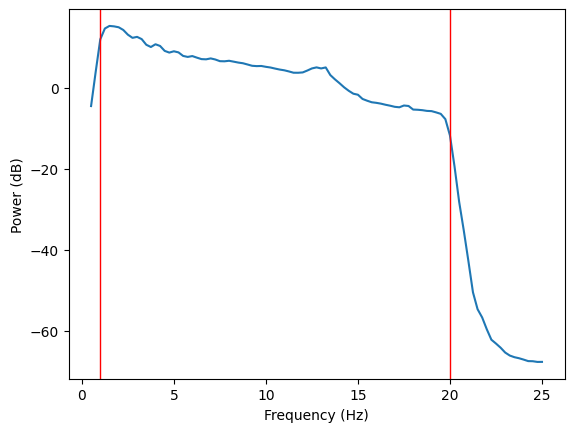

In [29]:
import matplotlib.pyplot as plt
plt.plot( res[ 'F' ] , res[ 'PSD' ] )
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dB)')
[plt.axvline(_x, linewidth=1, color='r') for _x in [1,20] ]
plt.show()

## Refreshing the instance

Having completed the last example, it is important to remember that the _instance_ referenced by `p` has now been changed and that __these changes persist__.  This is different from the typical command-line invocation of `luna`, where each new `luna` command starts afresh from the EDF on disk.  Thus, if we now re-ran `stat()` we'd see different values from above:

In [30]:
p.stat()

,Value
annotation_files,tutorial/edfs/learn-nsrr02.xml
duration,09.57.30.000
edf_file,tutorial/edfs/learn-nsrr02.edf
elen,30.0
id,learn-nsrr02
na,10
ne,399
nem,796
ns,14
nt,14


Because we dropped epochs (by running `MASK` and `RE`) the current _instance_ now has only N2 epochs.  This is reflected by `ne` now equally 399 (the number of N2 epochs mentioned in the console output above) whereas the initial `stat()` output did not even include `ne` as the data had not at that point been epoched.  (Here, `nem` is the number of _masked_ epochs, 796.)   Whether or not one wants changes to persist depends on the sequence of analyses being performed, of course - either way, it is important to keep track of the current state (this is perhaps a general challenge of working with interactive, notebook-style environments).  

To _refresh_ the instance to its original state, the easiest way is to call `refresh()`, which returns the _instance_ to the original state (i.e. after `attach_edf()` and `attach_annot()` functions were run):

In [31]:
p.refresh()

___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


We now see that `stat()` returns the original values, i.e. "internally", we are back to having the entire EDF in memory, not just the selected N2 epochs.

In [32]:
p.stat()

,Value
annotation_files,tutorial/edfs/learn-nsrr02.xml
duration,09.57.30.000
edf_file,tutorial/edfs/learn-nsrr02.edf
id,learn-nsrr02
na,10
ns,14
nt,14
state,1


Note, simply trying to re-attach the EDF (with `p.attach_edf()` instead of `refresh()`) __would not work__ - you'll get an error about not being able to re-initialize the timeline.   If you really wanted to do this, you'd have to delete `p`, then re-create it, i.e. something like this:

Alternatively, you could use Luna's [FREEZE & THAW commands](http://zzz.bwh.harvard.edu/luna/ref/freezes) to give finer-grained control over snapshots certain states of an _instance_.  

For now, the bottom line is that is you're expecting a given command to run from the original version of the data, you might want to run `refresh()` beforehand to ensure this is the case.

## Accessing raw signal/annotation data 

Although the primary way to invoke Luna is via the `eval()` mechanism, it is also possible to extract the raw signal and/or annotation information.  Note, as above, one feature is that returned signals will respect the current state of the in-memory _instance_ - i.e. if prior Luna commands had masked all non-N2 epochs as above, then the commands below would only return N2 signals/annotations, etc. 

To pull signal and/or annotations, use the `data()` function, which expects a list of channels (`chs`) and annotations (`annots`). This will return an array of sample-points (rows) by channels (two columns): [TODO: supply default `None` values]

In [33]:
d = p.data( chs = [ 'EEG' , 'EEG_sec' ] , annots = [] )

`data()` returns a tuple, where the first element is a list of column labels, and the second element is the array itself.  All signals must have similar sample rates, or else you'll get an error message.

In [34]:
type(d)

tuple

In [35]:
d[0]

['EEG', 'EEG_sec']

In [36]:
type( d[1] )

numpy.ndarray

In [37]:
d[1].shape

(4481250, 2)

As an example, here we'll plot the first 1000 samples for `EEG` (column 0):

In [38]:
d[1]

array([[  -8.33333333,    4.41176471],
       [ -15.19607843,   -0.49019608],
       [ -16.17647059,   -6.37254902],
       ...,
       [  71.07843137,   25.        ],
       [  84.80392157,   10.29411765],
       [  51.47058824, -110.29411765]])

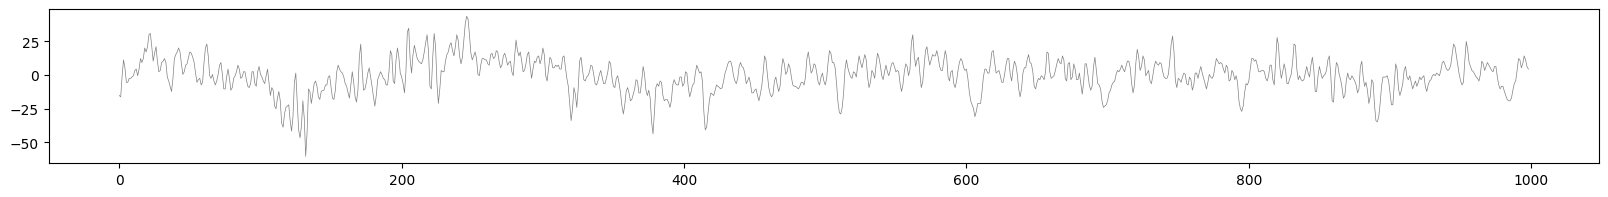

In [39]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,2))
plt.plot( d[1][1:1000:,0] , c = 'gray' , lw = 0.5 )
plt.show()

### Extracting subsets of recordings

The above application of `data()` returned an array with 4481250 rows.  We can check, this should correspond to the entire size of the EDF. First, we'll check the number of records and the sample rate of the EEG channels, using `HEADERS` as above:

In [40]:
lp.show( p.proc( 'HEADERS sig=EEG,EEG_sec' ) ) 

HEADERS: BL


 ..................................................................
 CMD #1: HEADERS
   options: sig=EEG,EEG_sec


,ID,EDF_ID,EDF_TYPE,NR,NS,NS_ALL,REC_DUR,REC_DUR_HMS,REC_DUR_SEC,START_DATE,START_TIME,STOP_TIME,TOT_DUR_HMS,TOT_DUR_SEC
0,learn-nsrr02,.,EDF,35850,2,14,1.0,09:57:30,35850.0,01.01.85,21.18.06,07.15.36,09:57:30,35850.0


HEADERS: CH


,ID,CH,DMAX,DMIN,PDIM,PMAX,PMIN,POS,SENS,SR,TRANS,TYPE
0,learn-nsrr02,EEG,127,-128,uV,125.0,-125.0,8,0.980392,125.0,.,EEG
1,learn-nsrr02,EEG_sec,127,-128,uV,125.0,-125.0,3,0.980392,125.0,.,EEG


Here we see a sample rate (`SR`) of 125 Hz for the EEG, and a total duration of 35850 seconds (that mant records, each of 1 second, i.e. with 125 samples).  Thus the expected size of the array is:

In [41]:
125 * 35850

4481250

which happily matches the size of the array returned by `data()` above.   As a check of how `data()` works, let's repeat this for N2 epochs only:

In [42]:
p.eval( ' MASK ifnot=N2 & RE ' ) 
d = p.data( chs = [ 'EEG' , 'EEG_sec' ] , annots = [] )
d = d[1]
d.shape

 ..................................................................
 CMD #1: MASK
   options: ifnot=N2 sig=*
  set epochs, to default length 30, 1195 epochs
  set masking mode to 'force'
  annots: N2
  applied annotation mask for 1 annotation(s)
  399 epochs match; 796 newly masked, 0 unmasked, 399 unchanged
  total of 399 of 1195 retained
 ..................................................................
 CMD #2: RE
   options: sig=*
  restructuring as an EDF+:  retaining 11970 of 35850 records
  of 597.5 minutes, dropping 398, retaining 199.5
  resetting mask
  clearing any cached values and recording options
  retaining 399 epochs


(1496250, 2)

As there are 399 30-second epochs, this number if consistent with what we'd expect for the number of rows:

In [43]:
125 * 399 * 30 

1496250

The above array will of course concatenate all N2 epochs and lose information about timing.  We'll see below how we can retain this by using `slide()` or `slices()` instead of `data()`.  But first, let's remember to _refresh()_ before continuing:

In [44]:
p.refresh()

___________________________________________________________________
Processing: learn-nsrr02 | tutorial/edfs/learn-nsrr02.edf
 duration 09.57.30, 35850s | time 21.18.06 - 07.15.36 | date 01.01.85

 signals: 14 (of 14) selected in a standard EDF file
  SaO2 | PR | EEG_sec | ECG | EMG | EOG_L | EOG_R | EEG
  AIRFLOW | THOR_RES | ABDO_RES | POSITION | LIGHT | OX_STAT


### Get data by epoch or interval

Whereas `data()` returns all available (unmasked) records, `slice()` and `slices()` structure their output by the requested intervals/epochs.

For example, to return epochs 5 to 10 (using a 1-based indexes) all in a single array, we can use the `e2i` (epoch-to-interval) helper function to define the required intervals in _time-points_ (1e9 sec units): i.e. here we have five start/stop pairs for the five epochs, i.e. the first is 120-150 seconds, etc:  (`e2i()` uses the default epoch duration for that instance, here 30 seconds):

In [45]:
d = p.slice( p.e2i( list( range(5,10 ) ) ) , chs = ['EEG' , 'EEG_sec' ] )
d

  set epochs to default 30 seconds, 1195 epochs


(['EEG', 'EEG_sec'],
 array([[  3.43137255, -16.17647059],
        [  0.49019608, -11.2745098 ],
        [  1.47058824,  -4.41176471],
        ...,
        [ -5.39215686, -11.2745098 ],
        [ -2.45098039,   5.39215686],
        [ 12.25490196,   0.49019608]]))

We'd expect this many rows from 5 epochs, which matches the output:

In [46]:
125 * 5 * 30

18750

In [47]:
d[1].shape

(18750, 2)

Note that `slice()` accepts arbitrary intervals (a list of start/stop tuples in time-point units) - you do not need to use `e2i()`.

A slight variant on the above, `slices()` (versus `slice()`) returns each interval (here, epoch) as a separate array: here is an example but now with a single signal but also adding an annotation and time-track:

In [48]:
d = p.slices( p.e2i( list( range(5,10 ) ) ) , chs = 'EEG' , annots = 'W' , time = True )
d

(['T', 'W', 'EEG'],
 [array([[120.        ,   1.        ,   3.43137255],
         [120.008     ,   1.        ,   0.49019608],
         [120.016     ,   1.        ,   1.47058824],
         ...,
         [149.976     ,   1.        ,   3.43137255],
         [149.984     ,   1.        ,  20.09803922],
         [149.992     ,   1.        ,   4.41176471]]),
  array([[150.        ,   1.        , -11.2745098 ],
         [150.008     ,   1.        , -10.29411765],
         [150.016     ,   1.        , -11.2745098 ],
         ...,
         [179.976     ,   1.        ,  -6.37254902],
         [179.984     ,   1.        ,  -7.35294118],
         [179.992     ,   1.        ,  -1.47058824]]),
  array([[180.        ,   1.        ,   3.43137255],
         [180.008     ,   1.        ,  -3.43137255],
         [180.016     ,   1.        ,  -7.35294118],
         ...,
         [209.976     ,   1.        ,   1.47058824],
         [209.984     ,   1.        ,   3.43137255],
         [209.992     ,   1.     

### Updating/inserting new signal data

It is also possible to insert signal data back into the _instance_, via either `insert_signal()` or (if that signal already exists in the EDF) `update_signal()`.  

For example, we'll first pull both EEGs for the whole recording:

In [49]:
d = p.data( chs = [ 'EEG' , 'EEG_sec' ] , annots = [] )[1]
eeg1 = d[:,0]
eeg2 = d[:,1]

First, we'll create a new signal that is the mirror image of the first EEG:

In [50]:
gee1 = eeg1 * -1 

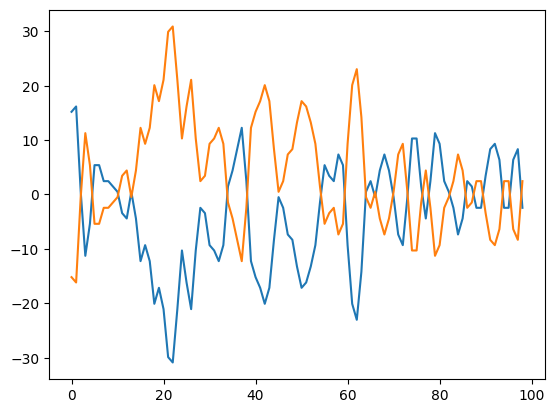

In [51]:
plt.plot( gee1[1:100] )
plt.plot( eeg1[1:100] )
plt.show()

We will then insert this new signal (`GEE`) back into the EDF:

In [52]:
p.insert_signal( label = 'GEE' , data = gee1 , sr = 125 )

True

In [53]:
p.channels()

,Channels
0,SaO2
1,PR
2,EEG_sec
3,ECG
4,EMG
5,EOG_L
6,EOG_R
7,EEG
8,AIRFLOW
9,THOR_RES


Next, we'll update the second EEG (`EEG_sec`) to be an exact copy of the first EEG channel (`EEG`) - this assumes the same sample rate, and so we do not need that argument:

In [54]:
p.update_signal( label = 'EEG_sec' , data = eeg1 ) 

True

We now have an EDF with three EEG channels: compared to the original `EEG`, the updated `EEG_sec` should be identical, whereas the new `GEE` channel should be perfectly anti-correlated.   We can use Luna's `CORREL` function to check this: 

In [55]:
p.eval( 'CORREL sig1=EEG sig2=EEG_sec,GEE' )

 ..................................................................
 CMD #1: CORREL
   options: sig=* sig1=EEG sig2=EEG_sec,GEE
  calculating correlation for 2 channel pairs


,Command,Strata
0,CORREL,CH1_CH2


In [56]:
p.table( 'CORREL' , 'CH1_CH2' )

,ID,CH1,CH2,R
0,learn-nsrr02,EEG,EEG_sec,1.0
1,learn-nsrr02,EEG,GEE,-1.0


Good, the above is as expected.

## Writing new files

You can write new EDF or annotation files (i.e. after modifying the data) using the standard Luna [WRITE](http://zzz.bwh.harvard.edu/luna/ref/outputs/#write) or [WRITE-ANNOTS](http://zzz.bwh.harvard.edu/luna/ref/annotations/#write-annots) functions, called via `eval()`.

In [57]:
p.eval( 'WRITE edf=new1' ) 

 ..................................................................
 CMD #1: WRITE
   options: edf=new1 sig=*
  no epoch mask set, no restructuring needed
  data are not truly discontinuous
  writing as a standard EDF
  writing 15 channels
  saved new EDF, new1.edf


,Command,Strata
0,WRITE,BL


To confirm that a new EDF has been generated, we could load it back in here, or use the command-line Luna to confirm.  The `remnrem/lunapi` Docker image includes a terminal as part of the JupyterLab envionrment.  Try opening one, do `ls` to list the files, and then run `luna` to check it is as expected.   In JupyterLab, go to the top-right `File -> New` menu and create a new `Terminal`.  Then list the contents (you'll see `new1.edf` along with these these notebooks and the `cmd1.txt` we create earlier):

As command-line Luna is installed in the Docker, you can invoke it there too, to confirm the properties of the new EDF:

That is, everything is as expected - we now have a new version of the original EDF, but with a new `GEE` channel. 

That completes this individual-level overview of the `lunapi` workflow.  You can see how to work with multiple individuals more easily in the [next notebook](./02_projects.ipynb).